#### Test run using some pre-generated values used in the IDL test examples
15-May-2020 IGH

TBD:
* Check against idl vesion of code (map not idl_org version)
* Check input data vs DEM model using actual tresp using here
* bug with dem_norm0 required?
* something up with elogt?
* Can we make this closer to the idl_org version, not just idl_map?
* Make some nice plots.....

In [10]:
# Import some of the stuff we will need
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import scipy.io as io
from dn2dem_pos import dn2dem_pos

import warnings
warnings.simplefilter('ignore')

## Setup the font used for plotting
# matplotlib.rcParams['font.sans-serif'] = "Arial"
# matplotlib.rcParams['font.family'] = "sans-serif"
matplotlib.rcParams['font.size'] = 18

In [11]:
# Load in the SSWIDL generated response functions
# Was produced by make_aiaresp_forpy.pro (can't escape sswidl that easily....)
trin=io.readsav('aia_resp.dat')

# Get rid of the b in the string name (byte vs utf stuff....)
for i in np.arange(len(trin['channels'])):
    trin['channels'][i]=trin['channels'][i].decode("utf-8")
print(trin['channels'])

# Get the temperature response functions in the correct form for demreg
tresp_logt=np.array(trin['logt'])
nt=len(tresp_logt)
nf=len(trin['tr'][:])
trmatrix=np.zeros((nt,nf))
for i in range(0,nf):
    trmatrix[:,i]=trin['tr'][i]

['A94' 'A131' 'A171' 'A193' 'A211' 'A335']


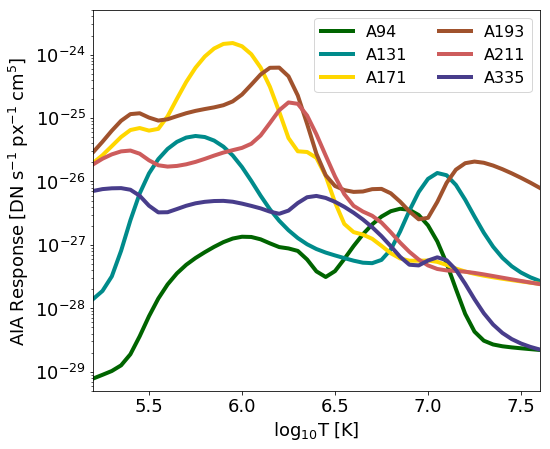

In [12]:
# Check the response look correct by plotting them

# Setup some AIA colours
clrs=['darkgreen','darkcyan','gold','sienna','indianred','darkslateblue']
      
fig = plt.figure(figsize=(8, 7))
for i in np.arange(6):
    plt.semilogy(trin['logt'],trin['tr'][i],label=trin['channels'][i],color=clrs[i],lw=4)
plt.xlabel('$\mathrm{\log_{10}T\;[K]}$')
plt.ylabel('$\mathrm{AIA\;Response\;[DN\;s^{-1}\;px^{-1}\;cm^5]}$')
plt.ylim([5e-30,5e-24])
plt.xlim([5.2,7.6])
plt.legend(ncol=2,prop={'size': 16})
plt.rcParams.update({'font.size': 16})
plt.show()


In [13]:
# Just define some data and uncertainties that well use to calculate the DEM
#  data in DN/s/px and from a Gaussian DEM model
dn_in=np.array([274.2, 166.9, 2842.9, 8496.3, 6941.9, 876.1])

#  error also DN/s/px - approx read + photon noise
edn_in=np.array([14.9, 10.9, 41.1, 65.3, 47.1, 14.1])

In [14]:
#  What temperature binning do we want for the output DEM?
#  These are the bin edges
temps=np.logspace(5.7,7.2,num=21)
# print(temps)

# Temperature bin mid-points for DEM plottin
mlogt=([np.mean([(np.log10(temps[i])),np.log10((temps[i+1]))]) for i in np.arange(0,len(temps)-1)])


In [15]:
# Work out the DEM

# Current version requires something for dem_norm0
#      dn2dem_pos.py, L35 => if ((dem_norm0.ndim) > 0):
dem,edem,elogt,chisq,dn_reg=dn2dem_pos(dn_in,edn_in,trmatrix,tresp_logt,temps,dem_norm0=np.ones(len(temps)-1))

Executing in serial
total elapsed time = 0:00:00.021134


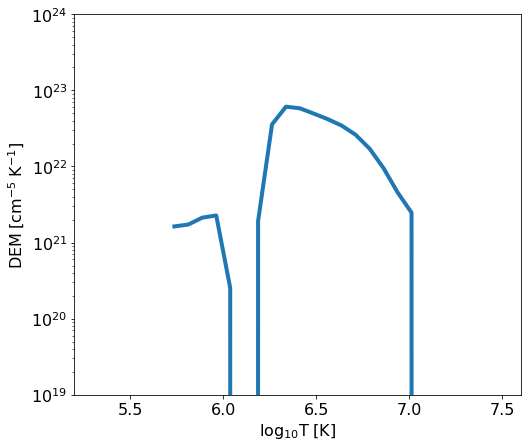

In [16]:
fig = plt.figure(figsize=(8, 7))
plt.semilogy(mlogt,dem,lw=4)
plt.xlabel('$\mathrm{\log_{10}T\;[K]}$')
plt.ylabel('$\mathrm{DEM\;[cm^{-5}\;K^{-1}]}$')
plt.ylim([1e19,1e24])
plt.xlim([5.2,7.6])
plt.rcParams.update({'font.size': 16})
plt.show()

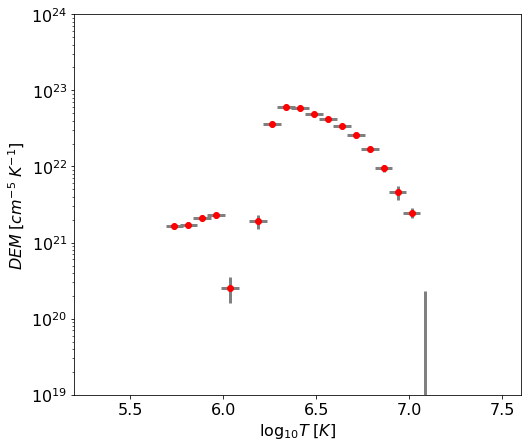

In [17]:
fig = plt.figure(figsize=(8, 7))
plt.errorbar(mlogt,dem,xerr=elogt,yerr=edem,fmt='or',ecolor='gray', elinewidth=3, capsize=0)
plt.xlabel('$\log_{10}T\;[K]$')
plt.ylabel('$DEM\;[cm^{-5}\;K^{-1}]$')
plt.ylim([1e19,1e24])
plt.xlim([5.2,7.6])
plt.rcParams.update({'font.size': 16})
plt.yscale('log')
plt.show()

In [18]:
#  All elogt the same size - did the idl version do this ? (not idl_org) 
print(elogt)

[0.0474621 0.0474621 0.0474621 0.0474621 0.0474621 0.0474621 0.0474621
 0.0474621 0.0474621 0.0474621 0.0474621 0.0474621 0.0474621 0.0474621
 0.0474621 0.0474621 0.0474621 0.0474621 0.0474621 0.0474621]
